# Tutorial No. 1

## 1. Import Packages

In [1]:
import tensorflow
from keras.datasets import mnist
from keras.models import Sequential, Model
import keras.layers as layers
from keras.utils import to_categorical

from keras import optimizers
from keras.models import model_from_json
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from plot_confusion_matrix import plot_confusion_matrix
import numpy as np



Using TensorFlow backend.


## 2. Load Data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Change labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#y_train = (y_train[:,0::2] == 1)
#y_test = (y_test[:,0::2] == 1)

#y_train = np.array([[not item.any() , item.any()] for item in y_train])
#y_test = np.array([[not item.any() , item.any()] for item in y_test])

# Print shapes
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
y_train shape: (60000, 10)
y_test shape: (10000, 10)


## 3. Define Parameters 

In [6]:
num_of_clss = 10           # number of classes
hidden_size = 10           # number of neurons in the hidden layer
lr = 1e-3 #usually start from 10^-3                  # learning rate 
beta_1 =  0.9 #momentum speed usually 0.9               # beta 1 - for adam optimizer
beta_2 =  0.95 # divide the values in squre grads usually 0.99              # beta 2 - for adam optimizer
epsilon = 1e-7        # epsilon - for adam optimizer
epochs = 50                # number of epochs how many times iterate over the data 
bs = 128  #usually multiply by 2 16 32 64 128 # bach calc loss update params                 # batch size


## 4. Build 2 Layers Network

In [7]:
#from tensorflow.python.keras import backend as k
from tensorflow.keras.models import Sequential
#from keras.layers import Activation, Dense ,Flatten
from tensorflow.keras.layers import Flatten, Dropout, Activation, Input, Dense, concatenate

in_dim = 28*28

model = Sequential()
model.add(Flatten())
model.add(Dense(hidden_size, input_dim=in_dim))
model.add(Activation('sigmoid'))
model.add(Dense(num_of_clss, input_dim=in_dim))
model.add(Activation('softmax'))


##  5. Train the Model

In [8]:
# define the optimizer and compile the model

adam = optimizers.Adam(lr=lr, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model, iterating on the data in batches
history = model.fit(x_train, y_train, validation_split=0.3, epochs=epochs, batch_size=bs)


Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 1s 34us/sample - loss: 1.6285 - accuracy: 0.5598 - val_loss: 1.2223 - val_accuracy: 0.7547
Epoch 2/50
42000/42000 [==============================] - 1s 17us/sample - loss: 1.0483 - accuracy: 0.7858 - val_loss: 0.8833 - val_accuracy: 0.8118
Epoch 3/50
42000/42000 [==============================] - 1s 18us/sample - loss: 0.7995 - accuracy: 0.8208 - val_loss: 0.7051 - val_accuracy: 0.8355
Epoch 4/50
42000/42000 [==============================] - 1s 17us/sample - loss: 0.6809 - accuracy: 0.8345 - val_loss: 0.6687 - val_accuracy: 0.8328
Epoch 5/50
42000/42000 [==============================] - 1s 18us/sample - loss: 0.6279 - accuracy: 0.8340 - val_loss: 0.5706 - val_accuracy: 0.8518
Epoch 6/50
42000/42000 [==============================] - 1s 18us/sample - loss: 0.5706 - accuracy: 0.8474 - val_loss: 0.5508 - val_accuracy: 0.8532
Epoch 7/50
42000/42000 [==============================] 

## 6. Visualize

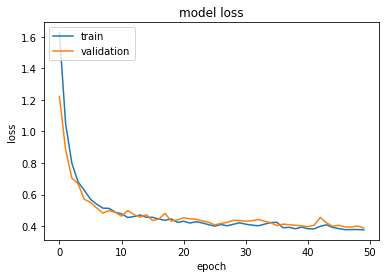

In [9]:
# plot train and validation loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show(); plt.close()


## 7. Model Evaluation

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)

# Print results
print('test loss:', test_loss)
print('test accuracy:', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

test loss: 0.38580376024246216
test accuracy: 0.8918


## 8. Predict on Test Set

Normalized confusion matrix
[[9.75510204e+01 0.00000000e+00 0.00000000e+00 1.02040816e-01
  0.00000000e+00 1.22448980e+00 5.10204082e-01 2.04081633e-01
  3.06122449e-01 1.02040816e-01]
 [2.11453744e+00 9.55066079e+01 8.81057269e-02 1.76211454e-01
  0.00000000e+00 0.00000000e+00 3.52422907e-01 1.76211454e-01
  1.58590308e+00 0.00000000e+00]
 [8.91472868e+00 3.87596899e-01 8.23643411e+01 2.03488372e+00
  1.25968992e+00 2.90697674e-01 6.78294574e-01 1.35658915e+00
  2.71317829e+00 0.00000000e+00]
 [6.03960396e+00 2.97029703e-01 1.88118812e+00 8.28712871e+01
  2.97029703e-01 3.26732673e+00 0.00000000e+00 1.58415842e+00
  3.36633663e+00 3.96039604e-01]
 [5.09164969e+00 2.03665988e-01 4.07331976e-01 0.00000000e+00
  8.86965377e+01 3.05498982e-01 6.10997963e-01 4.07331976e-01
  8.14663951e-01 3.46232179e+00]
 [1.15470852e+01 2.24215247e-01 8.96860987e-01 3.25112108e+00
  6.72645740e-01 7.60089686e+01 6.72645740e-01 4.48430493e-01
  5.71748879e+00 5.60538117e-01]
 [6.68058455e+00 0.00000000e+0

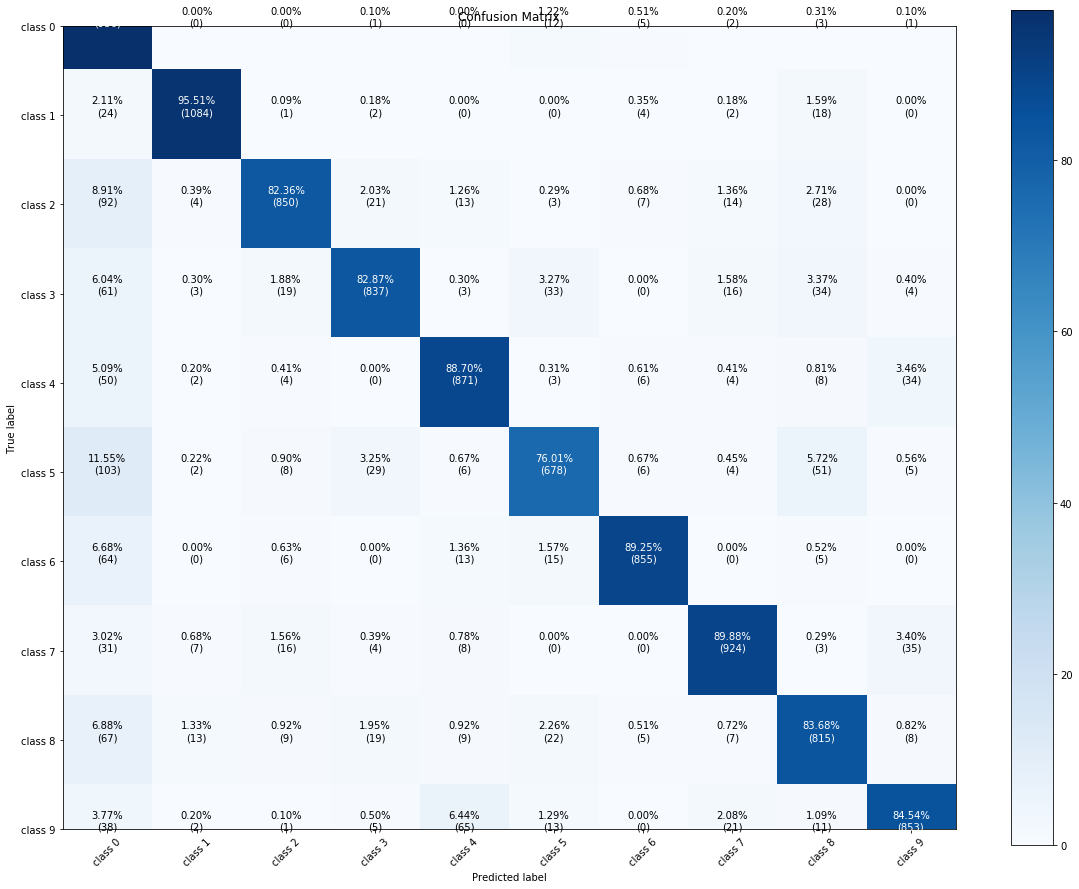

In [11]:
y_pred = model.predict(x_test)

# Confusion Matrix
cm = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(np.round(y_pred),axis=1))
labels = ['class ' + str(i) for i in range(num_of_clss)] 
plot_confusion_matrix(cm,labels,title='Confusion Matrix',normalize=True)


## 9. Summerize 

In [12]:
# Summerize the model arhiteture and parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  7850      
_________________________________________________________________
activation (Activation)      multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  110       
_________________________________________________________________
activation_1 (Activation)    multiple                  0         
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


## 10. Save the Model with the Learned Weights

In [13]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")


Saved model to disk


## 11. Load Saved Model

In [14]:
# load json and create model

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
from tensorflow.keras import models

loaded_model = tensorflow.keras.models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")


Loaded model from disk


## 12. Predict using Loaded Model 

Normalized confusion matrix
[[9.75510204e+01 0.00000000e+00 0.00000000e+00 1.02040816e-01
  0.00000000e+00 1.22448980e+00 5.10204082e-01 2.04081633e-01
  3.06122449e-01 1.02040816e-01]
 [2.11453744e+00 9.55066079e+01 8.81057269e-02 1.76211454e-01
  0.00000000e+00 0.00000000e+00 3.52422907e-01 1.76211454e-01
  1.58590308e+00 0.00000000e+00]
 [8.91472868e+00 3.87596899e-01 8.23643411e+01 2.03488372e+00
  1.25968992e+00 2.90697674e-01 6.78294574e-01 1.35658915e+00
  2.71317829e+00 0.00000000e+00]
 [6.03960396e+00 2.97029703e-01 1.88118812e+00 8.28712871e+01
  2.97029703e-01 3.26732673e+00 0.00000000e+00 1.58415842e+00
  3.36633663e+00 3.96039604e-01]
 [5.09164969e+00 2.03665988e-01 4.07331976e-01 0.00000000e+00
  8.86965377e+01 3.05498982e-01 6.10997963e-01 4.07331976e-01
  8.14663951e-01 3.46232179e+00]
 [1.15470852e+01 2.24215247e-01 8.96860987e-01 3.25112108e+00
  6.72645740e-01 7.60089686e+01 6.72645740e-01 4.48430493e-01
  5.71748879e+00 5.60538117e-01]
 [6.68058455e+00 0.00000000e+0

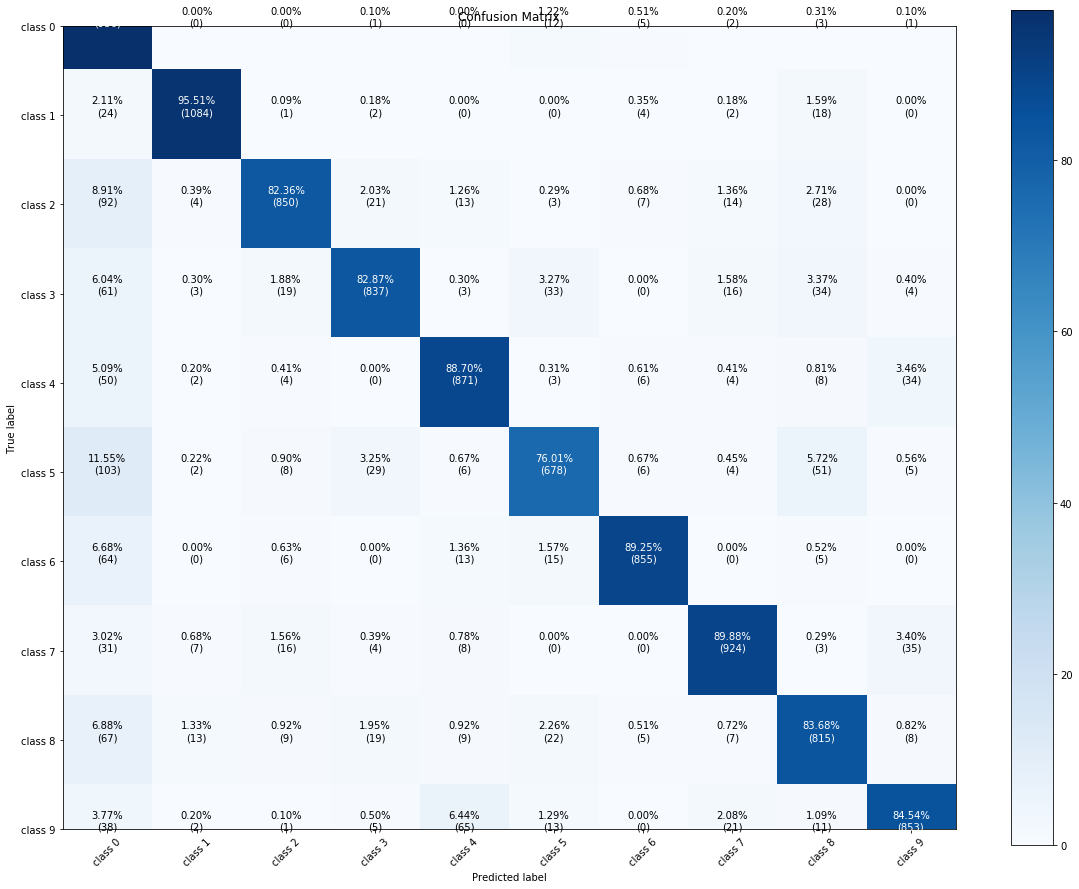

In [15]:
y_pred = loaded_model.predict(x_test)

# Confusion Matrix
cm = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(np.round(y_pred),axis=1))
labels = ['class ' + str(i) for i in range(num_of_clss)] 
plot_confusion_matrix(cm,labels,title='Confusion Matrix',normalize=True)


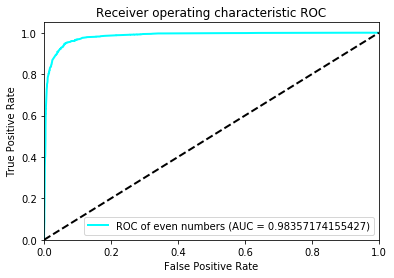

In [16]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Plot linewidth.
lw = 2

even_odd =  [[value[0::2].any(), value[1::2].any()] for value in y_test]

pred_even_odd = [[sum(value[0::2]), sum(value[1::2])] for value in y_pred]

    
# Compute ROC curve and ROC area for each class
fpr, tpr, threshold = roc_curve(np.array(even_odd)[:,0].astype(int), np.array(pred_even_odd)[:,0])
roc_auc = auc(fpr, tpr)

# Plot all ROC curves
#colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'blue', 'black', 'brown', 'purple', 'pink']
#for i, color in zip(range(num_of_clss), colors):
plt.plot(fpr, tpr, color='aqua', lw=lw,label='ROC of even numbers (AUC = {0})' ''.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ROC')
plt.legend(loc="lower right")
plt.show()



In [17]:
even_odd = []
for idx, value in enumerate(y_test):
    even_odd.append([value[0::2].any(), value[1::2].any()])

pred_even_odd = []
for idx, value in enumerate(y_pred):
    pred_even_odd.append([sum(value[0::2]), sum(value[1::2])])
    


In [137]:
y_pred.shape

(10000, 10)

In [4]:
even_odd =
even_odd

[[False, True],
 [True, False],
 [False, True],
 [True, False],
 [True, False],
 [False, True],
 [True, False],
 [False, True],
 [False, True],
 [False, True],
 [True, False],
 [True, False],
 [False, True],
 [True, False],
 [False, True],
 [False, True],
 [False, True],
 [False, True],
 [False, True],
 [True, False],
 [False, True],
 [True, False],
 [True, False],
 [False, True],
 [True, False],
 [True, False],
 [False, True],
 [True, False],
 [True, False],
 [False, True],
 [False, True],
 [False, True],
 [False, True],
 [True, False],
 [False, True],
 [True, False],
 [False, True],
 [False, True],
 [True, False],
 [False, True],
 [False, True],
 [False, True],
 [True, False],
 [True, False],
 [False, True],
 [False, True],
 [False, True],
 [True, False],
 [True, False],
 [True, False],
 [True, False],
 [False, True],
 [False, True],
 [False, True],
 [True, False],
 [True, False],
 [True, False],
 [False, True],
 [False, True],
 [False, True],
 [False, True],
 [True, False],
 [False,